In [1]:
from search import *
from data_processing import *
import itertools
import numpy as np
import pprint as pp
from time import sleep

# test functions individually
# run stuff to see if it actually works as intended

df = import_data('data/small-test-dataset.txt')
df2 = import_data('data/large-test-dataset.txt')
df3 = import_data('data/CS170_Spring_2023_Small_data__28.txt')
df4 = import_data('data/CS170_Spring_2023_Large_data__28.txt')

df = df.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

print(df[0].value_counts())
print(df2[0].value_counts())


0
2.0000000e+000    75
1.0000000e+000    25
Name: count, dtype: int64
0
2.0000000e+000    810
1.0000000e+000    190
Name: count, dtype: int64


In [2]:
import pandas as pd
import numpy as np

def get_min_max(data):
    min_max_dict = {}
    for column in data.columns:
        column_data = data[column]
        if pd.api.types.is_numeric_dtype(column_data):
            column_min = column_data.min()
            column_max = column_data.max()
            column_avg = column_data.mean()
            min_max_dict[column] = [column_min, column_max, column_avg]
    return min_max_dict

min_max_values = get_min_max(df4)

# Create a NumPy matrix from the table data
table_data = []
for column, (column_min, column_max, column_avg) in min_max_values.items():
    table_data.append([column, column_min, column_max, column_avg])
matrix = np.array(table_data)

# Define the headers
headers = ["Column", "Minimum value", "Maximum value", "Average value"]

# Print the matrix
print("Minimum and maximum values for each column:")
print(np.concatenate((np.array([headers]), matrix), axis=0))


Minimum and maximum values for each column:
[['Column' 'Minimum value' 'Maximum value' 'Average value']
 ['1.0' '-2.734991' '3.0778424' '0.002889943772300004']
 ['2.0' '-2.6845858' '3.4064045' '-0.007097774625469999']
 ['3.0' '-3.1813147' '3.4425112' '0.026611699791599996']
 ['4.0' '-3.0602833' '3.9146585' '-0.021215393007099993']
 ['5.0' '-3.0347602' '3.2092888' '-0.03432731534386']
 ['6.0' '-3.1742697' '3.5179893' '0.04304934068243001']
 ['7.0' '-3.6841989' '3.4130354' '-0.03603578525057']
 ['8.0' '-3.9292956' '2.7192835' '0.012986003831529992']
 ['9.0' '-2.6107994' '3.4247315' '-0.03913721836478999']
 ['10.0' '-3.0245709' '3.1865442' '0.028107629999260007']
 ['11.0' '-2.9428647' '2.9601315' '0.09571357454108002']
 ['12.0' '-2.5420459' '3.2754366' '-0.01584614758536']
 ['13.0' '-3.0533236' '3.316381' '-0.009134898045620012']
 ['14.0' '-3.110608' '3.1055977' '-0.025338026632850005']
 ['15.0' '-3.0124219' '2.9635153' '-0.005335885680999999']
 ['16.0' '-2.7945323' '3.3998691' '-0.021935

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def create_scatter_plot(df, a, b, title):
    feature_a_index = a
    feature_b_index = b

    feature_a = df.iloc[:, feature_a_index]
    feature_b = df.iloc[:, feature_b_index]
    
    # Convert each value to float before comparing
    classes = df.iloc[:, 0].apply(lambda x: 'red' if float(x) == 1.0 else 'blue' if float(x) == 2.0 else x)

    plt.scatter(feature_a, feature_b, c=classes)
    plt.xlabel(f'Feature {feature_a_index}')
    plt.ylabel(f'Feature {feature_b_index}')
    plt.title(f'{title} Dataset: Feature {feature_a_index} vs Feature {feature_b_index}')

    plt.show()

def create_3d_scatter_plot(df, a, b, c, title):
    feature_a = df.iloc[:, a]
    feature_b = df.iloc[:, b]
    feature_c = df.iloc[:, c]
    
    # Convert each value to float before comparing
    classes = df.iloc[:, 0].apply(lambda x: 'red' if float(x) == 1.0 else 'blue' if float(x) == 2.0 else x)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(feature_a, feature_b, feature_c, c=classes)
    ax.set_xlabel(f'Feature {a}')
    ax.set_ylabel(f'Feature {b}')
    ax.set_zlabel(f'Feature {c}')
    plt.title(f'{title} Dataset: Feature {a} vs Feature {b} vs Feature {c}')

    plt.show()



In [5]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column of interest is named 'column_name'
column_name = 5

# Calculate statistics
mean_value = df[column_name].mean()
std_value = df[column_name].std()
median_value = df[column_name].median()
variance_value = df[column_name].var()

# Print the statistics
print("Mean:", mean_value)
print("Standard Deviation:", std_value)
print("Median:", median_value)
print("Variance:", variance_value)


Mean: 3.0671062234000006
Standard Deviation: 1.0377311595211716
Median: 3.1336524
Variance: 1.0768859594411553


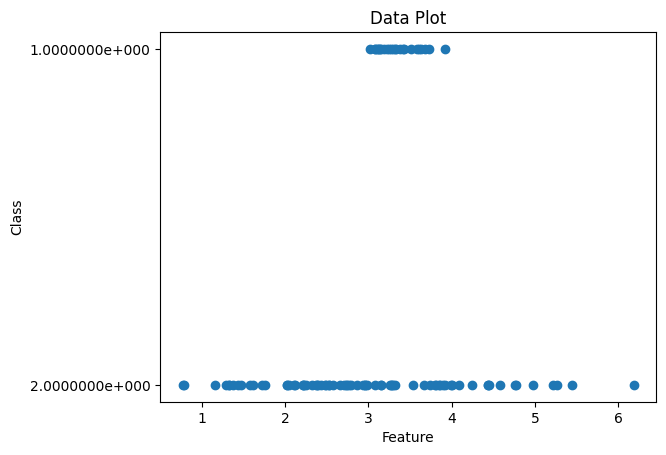

In [6]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
feature_column = 5
class_column = 0

# Extract the feature and class columns
feature_data = df.iloc[:, feature_column]
class_data = df.iloc[:, class_column]

# Create a scatter plot
plt.scatter(feature_data, class_data)
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Data Plot')
plt.show()

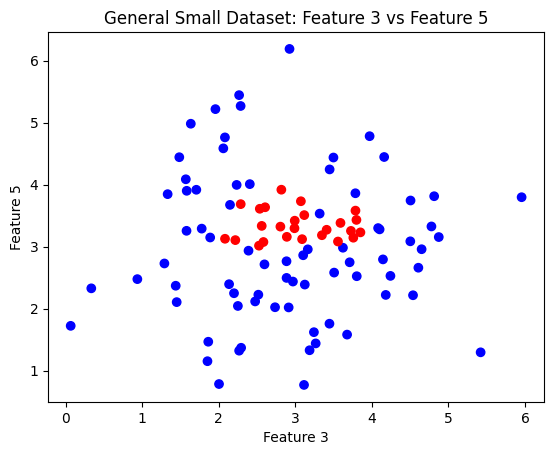

In [7]:
create_scatter_plot(df, 3, 5, "General Small")

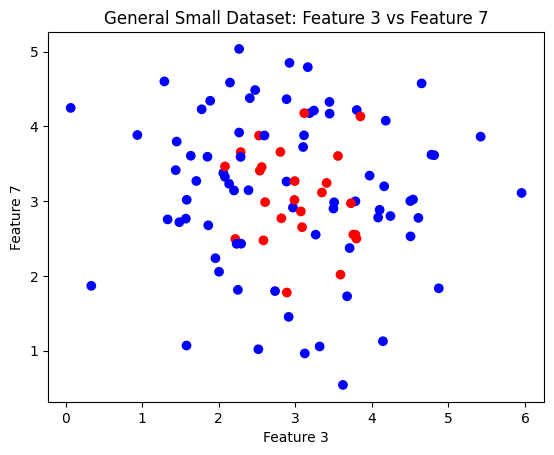

In [8]:
create_scatter_plot(df, 3, 7, "General Small")

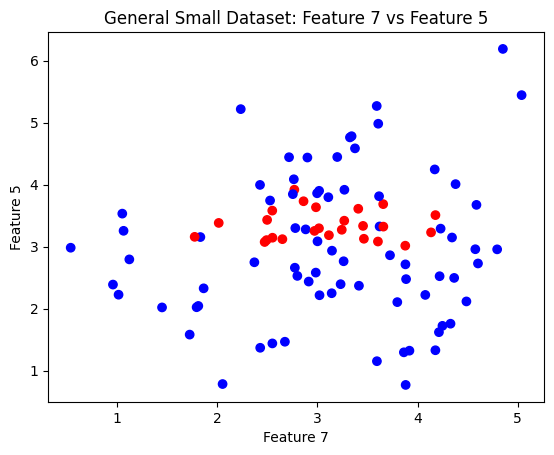

In [9]:
create_scatter_plot(df, 7, 5, "General Small")

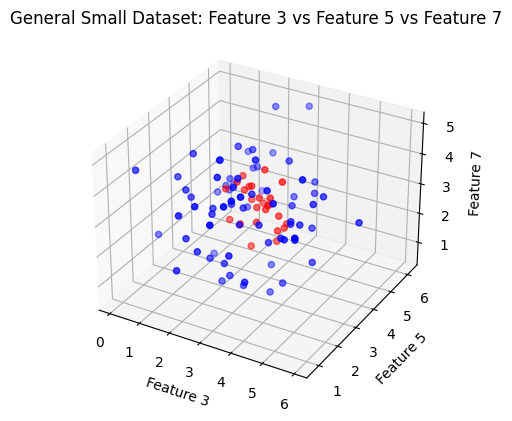

In [10]:
# x = df.iloc[:, 3] 
# y = df.iloc[:, 5] 
# z = df.iloc[:, 7]  
# classes = df.iloc[:, 0].replace({'1.0000000e+000': 'red', '2.0000000e+000': 'blue'}) 
# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c=classes)
# ax.set_xlabel('Feature 1')
# ax.set_ylabel('Feature 2')
# ax.set_zlabel('Feature 3')
# plt.title('3D Graph')

# plt.show()
create_3d_scatter_plot(df, 3, 5, 7, "General Small")

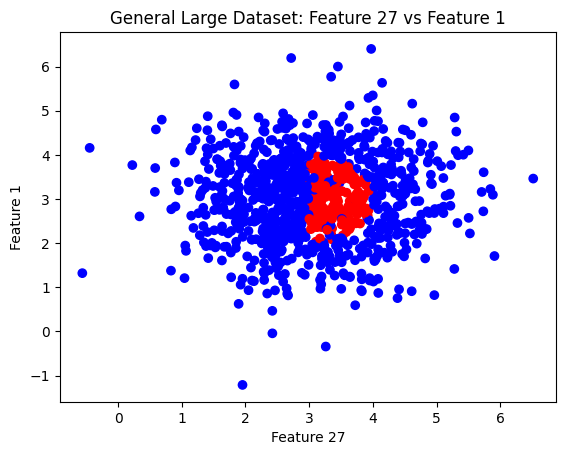

In [11]:
create_scatter_plot(df2, 27, 1, "General Large")

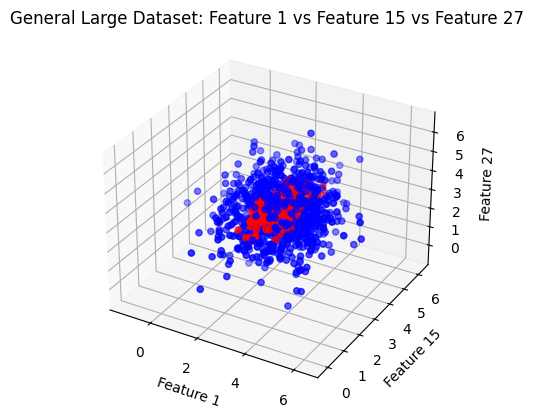

In [12]:
create_3d_scatter_plot(df2, 1, 15, 27, "General Large")

after some testing:

- k=1 feature set [3, 5] seems to be best, k = 3, 5, 7 decreses performance

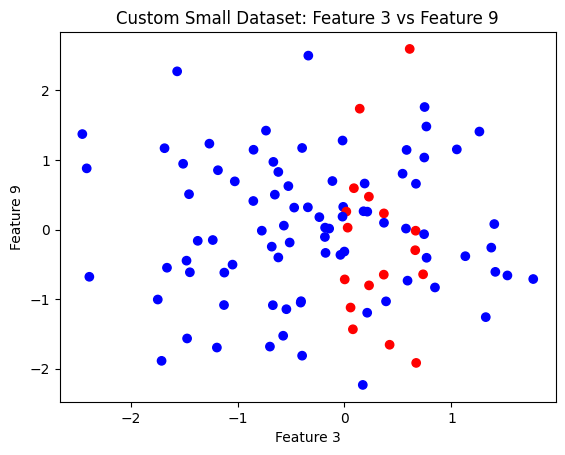

In [13]:
create_scatter_plot(df3, 3, 9, "Custom Small")

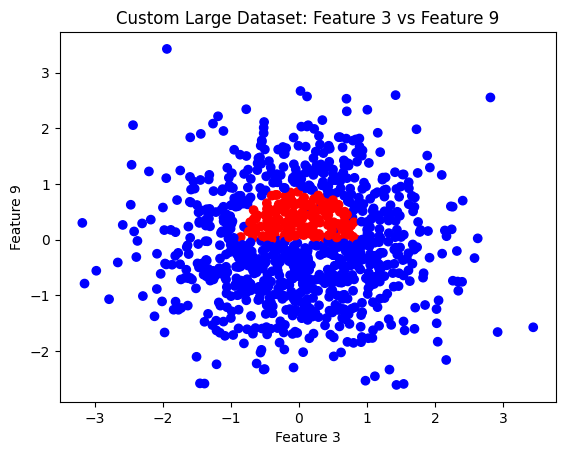

In [14]:
create_scatter_plot(df4, 3, 9, "Custom Large")